In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-tamil/language-model/')

In [6]:
#class TamilTokenizer(BaseTokenizer):
#    def __init__(self, lang:str):
#        self.lang = lang
#        self.sp = spm.SentencePieceProcessor()
#        self.sp.Load(str("tamil_spm_8k.model"))
#        
#    def tokenizer(self, t:str) -> List[str]:
#        return self.sp.EncodeAsPieces(t)

In [7]:
from inltk.tokenizer import TamilTokenizer

In [8]:
sp = spm.SentencePieceProcessor()
sp.Load(str('tamil_spm_8k.model'))
itos = [sp.IdToPiece(int(i)) for i in range(8000)]

In [9]:
tamil_vocab = Vocab(itos)

In [10]:
tokenizer = Tokenizer(tok_func=TamilTokenizer, lang='ta')

In [11]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [12]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-tamil/language-model')

In [13]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=tamil_vocab)

In [14]:
data_lm.batch_size

64

In [15]:
data_lm.save('data_lm_tawiki_8k.pkl')

In [16]:
data_lm.show_batch()

In [17]:
len(data_lm.vocab.itos)

8000

In [18]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [19]:
gc.collect()

31

In [20]:
!nvidia-smi

Thu Oct 24 16:36:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.116                Driver Version: 390.116                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P2    61W / 250W |   1076MiB / 11177MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [82]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


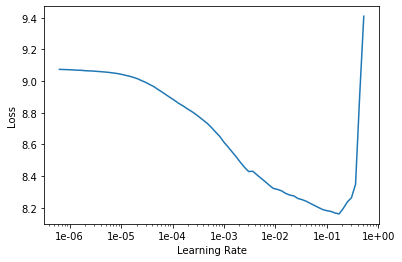

In [83]:
learn.recorder.plot()

In [84]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(8000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps=

In [85]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

Better model found at epoch 0 with accuracy value: 0.36401626467704773.
Better model found at epoch 1 with accuracy value: 0.40505048632621765.
Better model found at epoch 2 with accuracy value: 0.40639322996139526.
Better model found at epoch 3 with accuracy value: 0.4166480004787445.


KeyboardInterrupt: 

In [86]:
np.exp(3.37)

29.07852705779708

In [21]:
learn.load('model')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (357 items)
x: LMTextList
▁ x x b os ▁< doc ▁id =" 12 7 22 " ▁ url =" https : ▁ / ▁ / ▁ ta . wikipedia . org ▁ / ▁ wiki ? curi d = 12 7 22 " ▁title =" ம லே ரியா "> ▁ம லே ரியா ▁ம லே ரியா ▁என்பது ▁நோய் ▁பரப்ப ி ▁அல்லது ▁நோய் க்கா வி ▁வாயிலாக ▁பரவ ும் ▁தொற்று ப்ப ண் ப ுடைய ▁ஒரு ▁தொற்று நோ யாகும் . ▁இது ▁முதற் கல வு ரு ▁ஒட்டு ண்ணி கள் ▁மூலம் ▁ஏற்படுகிறது . ▁அமெரிக்கா , ▁ஆசியா ▁மற்றும் ▁ஆப்பிரிக்கா ▁ஆகிய ▁பகுதி களையும் ▁சேர்த்து ▁வெப்ப ▁வலய ம் ▁சார்ந்த ▁மற்றும் ▁மித வெப்ப ▁மண்டல ▁பிரதேச ங்களிலும் ▁இது ▁பரவலாக க் ▁காணப்படுகிறது . ▁ஒவ்வொரு ▁ஆண்டு ம் ▁தோராயமாக ▁3 50 ▁முதல் ▁500 ▁மில்லியன் ▁வரையிலான ▁மக்கள் ▁ம லே ரியா ▁நோ யினால் ▁பாதிக்கப்பட ுகிறார்கள் . ▁அவற்றில் ▁ஒன்ற ிலிருந்து ▁மூன்று ▁மில்லியன் ▁மக்கள் ▁இந்த ▁நோ யினால் ▁இறக்க ிறார்கள் . ▁இந்த ▁நோ யின் ▁காரணமாக ▁இறப்ப வர் களில் ▁அதிகமான வர் ▁ச ப் - ச ஹா ரா ▁( s ub - s a har an ) ▁ஆப்பிரிக்கா வில் ▁இருக்கும் ▁இளம் ▁குழந்தை களாவர் . ▁ம லே ரியா ▁தொடர்பாக ▁ஏற்படும் ▁இறப்பு களில் ▁ 90 ▁சதவீத

In [22]:
learn.fit_one_cycle(10, 1e-4, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model2')])

Better model found at epoch 0 with accuracy value: 0.43688735365867615.
Better model found at epoch 1 with accuracy value: 0.4465167820453644.
Better model found at epoch 2 with accuracy value: 0.45231372117996216.
Better model found at epoch 3 with accuracy value: 0.4571613073348999.
Better model found at epoch 4 with accuracy value: 0.46117910742759705.
Better model found at epoch 5 with accuracy value: 0.46375182271003723.
Better model found at epoch 6 with accuracy value: 0.466135710477829.
Better model found at epoch 7 with accuracy value: 0.467425137758255.
Better model found at epoch 8 with accuracy value: 0.4681684374809265.
Better model found at epoch 9 with accuracy value: 0.46834123134613037.


In [23]:
TEXT = "இந்த கிராமத்தில்"
N_WORDS = 40
N_SENTENCES = 2

In [24]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

இந்த கிராமத்தில் ▁உள்ள ▁மக்கள் ▁வேளாண்மை யில் ▁நோய் ▁தாக்க மடை ▁சமூக த்தைச் ▁சேர்ந்த வர்களின் ▁கால்நடை ▁பண்ணை யில் ▁வாழ்ந்து ▁இவர்கள் ▁பெரும்பான்மை யினர் ▁கல்வி ▁ப யிலும் ▁சிறு வர்கள் ▁உடைய ▁நாடு ▁இதுவே ▁இ ▁வறுமை ▁சார்ந்த ▁சேவை ▁புரிந்தார் ▁முறைகள் ▁< ▁ / ▁ doc > ▁< doc
இந்த கிராமத்தில் ▁மாணவர்களுக்கு ▁மக்கள ான ▁சிறு ▁பள்ளி ▁வகுப்பு களையும் ▁கொண்டுள்ளது . ▁இது ▁பெரிய ▁இடத்தில் ▁இருந்து ▁சுமார் . ▁மாகாணம் ▁முழுவதும் ▁செயல்பட்டு வந்த து . ▁நடைமுறையில் ▁முழு நேர ▁சேவை யினை க்குழு வின் ▁க ணி ப்ப ீட்டு , ▁நகர் ▁பணி ச்சாலை யின் ▁பொறுப்ப ாளர் களுக்க


In [25]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [26]:
# Generating embedding vectors for visualization

In [27]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-tamil/language-model')

In [28]:
# defaults.device = torch.device('cpu')

In [29]:
# learn = load_learner(path / 'TamilWikiDataset/')

In [30]:
encoder = get_model(learn.model)[0]

In [31]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([8000, 410])

In [32]:
embeddings = encoder.state_dict()['encoder.weight']

In [33]:
embeddings = np.array(embeddings)

In [34]:
embeddings[0].shape

(410,)

In [35]:
df = pd.DataFrame(embeddings)

In [36]:
df.shape

(8000, 410)

In [37]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [38]:
df.head()

0         1         2         3         4         5         6    \
0  0.201531  0.070240  0.248638 -0.170501 -0.100066 -0.140052 -0.127656   
1 -0.295118 -0.043863 -0.182272  0.036199  0.074052 -0.122913  0.038548   
2 -0.295530 -0.044470 -0.183705  0.028536  0.077037 -0.125462  0.034490   
3 -0.819153  0.194079  0.208769 -0.468402 -0.228696  0.374907  0.024094   
4 -0.147666 -0.266755  0.105820  0.197500 -0.234368  0.223156  0.231025   

        7         8         9    ...       400       401       402       403  \
0 -0.157643  0.151104 -0.448037  ...  0.126890 -0.369856 -0.220526  0.125616   
1 -0.429710 -0.057384 -0.033033  ... -0.123613 -0.008757  0.052358  0.201758   
2 -0.432402 -0.056356 -0.037684  ... -0.122195 -0.009483  0.050464  0.204277   
3  0.050085  0.472015 -0.176538  ...  0.141784  0.298867 -0.117482  0.132363   
4  0.102590  0.139997 -0.200653  ... -0.006067  0.264467 -0.259053  0.009370   

        404       405       406       407       408       409  
0  0.084348  0.045237 -0.159257  0.324366  0.142772  0.385541  
1  0.207798  0.101461  0.116268 -0.008526 -0.132328 -0.022433  
2  0.212334  0.106032  0.113421 -0.009159 -0.132311 -0.022782  
3 -0.233914 -0.065098 -0.287045 -0.233568  0.081545  0.584539  
4 -0.207054 -0.220311 -0.219969  0.093128  0.150266 -0.106842  

[5 rows x 410 columns]

In [39]:
df2 = pd.DataFrame(itos)

In [40]:
df2.head()

0
0  <unk>
1    <s>
2   </s>
3      .
4      ,

In [41]:
df2.shape

(8000, 1)

In [42]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [43]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.9512e-01, -4.3863e-02, -1.8227e-01,  3.6199e-02,  7.4052e-02,
        -1.2291e-01,  3.8548e-02, -4.2971e-01, -5.7384e-02, -3.3033e-02,
         3.9312e-02, -1.1077e-01, -1.0474e-01, -1.9436e-01,  8.7637e-02,
         5.5221e-02, -2.4077e-01, -1.7993e-01,  7.3158e-02,  1.0488e-01,
         2.1361e-01,  5.2140e-02, -9.9095e-02, -4.0275e-02,  2.1779e-02,
        -2.5530e-01, -5.6470e-02, -5.7395e-02,  1.7028e-01, -7.5157e-02,
        -4.2022e-02,  5.6459e-02, -2.5862e-01, -1.6559e-02, -4.1027e-02,
        -7.1873e-02,  1.2957e-01,  4.7269e-02, -2.6458e-02, -1.9580e-02,
        -3.7060e-01, -4.2302e-02, -1.2849e-01, -5.3239e-02, -2.9117e-01,
         1.4820e-01,  1.3161e-01, -7.3767e-03,  1.0687e-01, -1.2767e-01,
         1.4625e-03,  1.5462e-01, -1.3666e-01, -2.0117e-01, -1.5720e-01,
         2.9808e-02,  7.3215e-02, -1.5033e-01, -2.5104e-01, -1.0819e-01,
        -7.3915e-01,  3.4486e-02, -1.0062e-01,  1.1543e-01,  1.1628e-01,
        -6.3551e-02, -5.7059e-02, -1.1042e-01, -1.5